$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\renewcommand{\vec}[1]{\bs{#1}}$

# 3 Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F

In [2]:
torch.cuda.is_available(), torch.cuda.get_device_name()

(True, 'NVIDIA GeForce RTX 4070 Laptop GPU')

- **Beta dist**: $p(\theta)=\operatorname{Beta}(\theta \mid \breve{\alpha},\breve{\beta}) \propto \theta^{\breve\alpha-1}(1-\theta)^{\breve\beta-1}$ 

In [3]:
# Beta dist
from torch.distributions import Beta

In [4]:
def beta_pdf(alpha, beta, shape=1, bins=1000):
    m = Beta(torch.FloatTensor([alpha]), torch.FloatTensor([beta]))
    m_sample = m.sample(torch.Size([shape]))
    x = range(bins)
    hist = torch.histc(m_sample, bins=bins, min=0, max=1)
    return (x, hist) #F.normalize(hist, dim=0))

p_theta = beta_pdf(0.5, 0.5, shape=int(1e6))

(0.0, 800.0)

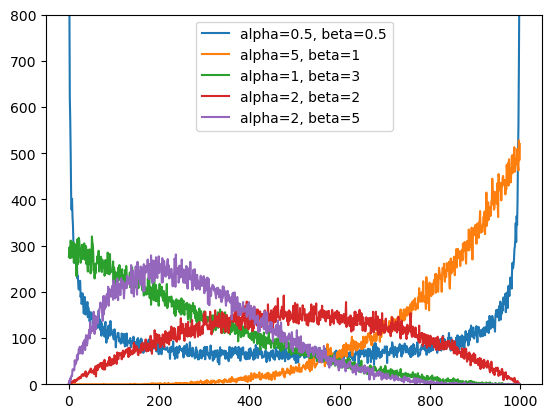

In [5]:
alpha = [0.5, 5, 1, 2, 2]
beta = [0.5, 1, 3, 2, 5]

for i in range(len(alpha)):
    x, pdf = beta_pdf(alpha[i], beta[i], shape=int(1e5))
    plt.plot(x, pdf, label=f"alpha={alpha[i]}, beta={beta[i]}")
plt.legend()
plt.ylim(0, 800)

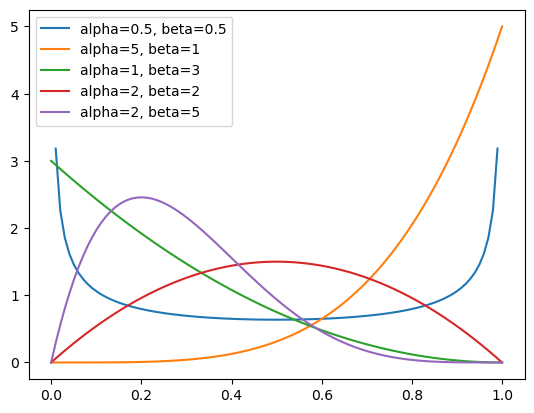

In [6]:
# Generate random samples from the Beta distribution
samples = torch.linspace(0, 1, 100)  # Range of values
pdf = Beta(alpha[3], beta[-1]).log_prob(samples).exp()  # Probability density function

# plot the thing
for i in range(len(alpha)):
    pdf = Beta(alpha[i], beta[i]).log_prob(samples).exp()
    plt.plot(samples, pdf, label=f"alpha={alpha[i]}, beta={beta[i]}")
plt.legend()

### 3.3.2 Bootstrap approximation of the sampling distribution

In [7]:
from torch.distributions import Bernoulli

In [8]:
choices = [10, 100]
theta = 0.7
N_boots = int(1e4)

m_boots = Bernoulli(torch.FloatTensor([0.7]))
s_boots = m_boots.sample(torch.Size([10]))

def mle_fn(x):
    return torch.mean(x)

for n_i in choices:
    m_boots = Bernoulli(torch.FloatTensor([theta]))
    

In [9]:
s_boots

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [10]:
mle_fn(s_boots)

tensor(0.8000)